**Omdena's AI for Road Safety Challenge**

Data Source Link - 
https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data

Objective - Assess 2019 statistcs around accidents, casualties and vehicles

**How to use:**

Download the datasets 

1. Road Safety Data - Accidents 2019

2. STATS19 Variable lookup data guide (from the Supporting documents below Data Links)

# Data Preparation

In [2]:
import numpy as np
import pandas as pd

In [3]:
df_accidents = pd.read_csv('Road Safety Data - Accidents 2019.csv')

C:\Users\nroy0\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546


In [5]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

In [6]:
df_accidents['East_North_OSGR'] = df_accidents['Location_Easting_OSGR'] + df_accidents['Location_Northing_OSGR']

In [7]:
df_accidents['East_North_OSGR'].value_counts()

658245.0    7
716940.0    7
713443.0    7
711105.0    7
714130.0    7
           ..
999330.0    1
737187.0    1
737188.0    1
868261.0    1
655360.0    1
Name: East_North_OSGR, Length: 97895, dtype: int64

In [8]:
df_accidents[df_accidents['East_North_OSGR'] == 658245.0]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,East_North_OSGR
79310,2019430024462,452285.0,205960.0,-1.244002,51.749909,43,2,2,1,22/01/2019,...,8,4,1,2,0,0,1,3,E01028588,658245.0
79705,2019430069177,452285.0,205960.0,-1.244002,51.749909,43,3,2,1,05/03/2019,...,8,4,2,2,0,0,1,1,E01028588,658245.0
79988,2019430100634,454614.0,203631.0,-1.210633,51.728748,43,3,2,1,31/03/2019,...,0,4,1,1,0,0,1,3,E01028530,658245.0
80486,2019430168292,454613.0,203632.0,-1.210647,51.728758,43,3,2,1,08/03/2019,...,0,1,5,2,0,0,1,2,E01028530,658245.0
80512,2019430171180,452285.0,205960.0,-1.244002,51.749909,43,2,2,1,05/06/2019,...,0,1,1,1,0,0,1,3,E01028588,658245.0
81518,2019430287225,452284.0,205961.0,-1.244017,51.749918,43,2,2,1,17/08/2019,...,8,4,1,1,0,0,1,3,E01028588,658245.0
81800,2019430316564,452245.0,206000.0,-1.244576,51.750272,43,2,1,1,10/10/2019,...,8,4,1,2,0,0,1,1,E01028582,658245.0


Take combination of Easting and Northing and count number of accidents at the same place


In [9]:
# To check the categories present

for column in df_accidents.columns:
    if len(list(df_accidents[column].unique())) < 15:
        print(column)
        print(df_accidents[column].value_counts())
        print('--------------------')

Accident_Severity
3    92456
2    23422
1     1658
Name: Accident_Severity, dtype: int64
--------------------
Day_of_Week
6    19056
5    17973
4    17775
3    17598
2    16643
7    15556
1    12935
Name: Day_of_Week, dtype: int64
--------------------
1st_Road_Class
3    52342
6    40459
4    14538
5     6067
1     3810
2      320
Name: 1st_Road_Class, dtype: int64
--------------------
Road_Type
6    85320
3    18590
1     6880
2     2664
9     2143
7     1939
Name: Road_Type, dtype: int64
--------------------
Speed_limit
 30    69305
 60    14514
 20    11747
 40    10021
 70     7153
 50     4716
-1        80
Name: Speed_limit, dtype: int64
--------------------
Junction_Detail
 0    48993
 3    33660
 6    11221
 1     9183
 9     5666
 8     2722
 2     1664
 5     1551
 7     1479
-1     1397
Name: Junction_Detail, dtype: int64
--------------------
Junction_Control
-1    52376
 4    50882
 2    13122
 3      773
 1      379
 0        4
Name: Junction_Control, dtype: int64
---------

In [10]:
import pandas as pd

df2 = pd. read_csv('Road Safety Data - Casualties 2019.csv')
df3 = pd. read_csv('Road Safety Data- Vehicles 2019.csv')
df2.shape, df3.shape

C:\Users\nroy0\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


((153158, 16), (216381, 23))

In [11]:
df2.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type', 'Casualty_IMD_Decile'],
      dtype='object')

In [12]:
df3.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type',
       'Vehicle_IMD_Decile'],
      dtype='object')

In [13]:
df2.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1


In [14]:
df3.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,-1,-1,-1,4,1,4


In [15]:
# Load all lookup sheets per feature in all the three datasets (accident, vehicle, casualties)

var_lookup = pd.read_excel('variable lookup.xls', sheet_name=None)

In [16]:
var_lookup.keys()

dict_keys(['Introduction', 'Export Variables', 'Police Force', 'Accident Severity', 'Day of Week', 'Local Authority (District)', 'Local Authority (Highway)', '1st Road Class', 'Road Type', 'Speed Limit', 'Junction Detail', 'Junction Control', '2nd Road Class', 'Ped Cross - Human', 'Ped Cross - Physical', 'Light Conditions', 'Weather', 'Road Surface', 'Special Conditions at Site', 'Carriageway Hazards', 'Urban Rural', 'Police Officer Attend', 'Vehicle Type', 'Towing and Articulation', 'Vehicle Manoeuvre', 'Vehicle Location', 'Junction Location', 'Skidding and Overturning', 'Hit Object in Carriageway', 'Veh Leaving Carriageway', 'Hit Object Off Carriageway', '1st Point of Impact', 'Was Vehicle Left Hand Drive', 'Journey Purpose', 'Sex of Driver', 'Age Band', 'Vehicle Propulsion Code', 'Casualty Class', 'Sex of Casualty', 'Age of Casualty', 'Casualty Severity', 'Ped Location', 'Ped Movement', 'Car Passenger', 'Bus Passenger', 'Ped Road Maintenance Worker', 'Casualty Type', 'IMD Decile', '

In [17]:
type(var_lookup['Police Force'])

pandas.core.frame.DataFrame

In [18]:
var_lookup['Police Force']

,code,label
0,1,Metropolitan Police
1,3,Cumbria
2,4,Lancashire
3,5,Merseyside
4,6,Greater Manchester
5,7,Cheshire
6,10,Northumbria
7,11,Durham
8,12,North Yorkshire
9,13,West Yorkshire


In [19]:
len(var_lookup.keys())

49

In [20]:
# To check if all the sheets have same naming convention
for key in var_lookup.keys():
    print(var_lookup[key].columns)

Index(['Data Guide'], dtype='object')
Index(['VARIABLES', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['Code', 'Label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='obje

In [21]:
for column in df_accidents.columns:
    if column.lower().replace('_', ' ') in list(
        [each_key.lower() for each_key in var_lookup.keys()]):
        print(column)

Police_Force
Accident_Severity
Day_of_Week
Local_Authority_(District)
Local_Authority_(Highway)
1st_Road_Class
Road_Type
Speed_limit
Junction_Detail
Junction_Control
2nd_Road_Class
Light_Conditions
Special_Conditions_at_Site
Carriageway_Hazards


In [22]:
list(var_lookup.keys())

['Introduction',
 'Export Variables',
 'Police Force',
 'Accident Severity',
 'Day of Week',
 'Local Authority (District)',
 'Local Authority (Highway)',
 '1st Road Class',
 'Road Type',
 'Speed Limit',
 'Junction Detail',
 'Junction Control',
 '2nd Road Class',
 'Ped Cross - Human',
 'Ped Cross - Physical',
 'Light Conditions',
 'Weather',
 'Road Surface',
 'Special Conditions at Site',
 'Carriageway Hazards',
 'Urban Rural',
 'Police Officer Attend',
 'Vehicle Type',
 'Towing and Articulation',
 'Vehicle Manoeuvre',
 'Vehicle Location',
 'Junction Location',
 'Skidding and Overturning',
 'Hit Object in Carriageway',
 'Veh Leaving Carriageway',
 'Hit Object Off Carriageway',
 '1st Point of Impact',
 'Was Vehicle Left Hand Drive',
 'Journey Purpose',
 'Sex of Driver',
 'Age Band',
 'Vehicle Propulsion Code',
 'Casualty Class',
 'Sex of Casualty',
 'Age of Casualty',
 'Casualty Severity',
 'Ped Location',
 'Ped Movement',
 'Car Passenger',
 'Bus Passenger',
 'Ped Road Maintenance Worker

In [23]:
df_accidents.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'East_North_OSGR'],
      dtype='object')

In [24]:
# Renaming columns which does not fall in the pattern

df_accidents=df_accidents.rename(columns = {'Weather_Conditions' : 'Weather',
'Pedestrian_Crossing-Human_Control' : 'Ped Cross - Human',
'Pedestrian_Crossing-Physical_Facilities' : 'Ped Cross - Physical',
'Urban_or_Rural_Area' : 'Urban Rural',
'Road_Surface_Conditions' : 'Road Surface',
'Did_Police_Officer_Attend_Scene_of_Accident' : 'Police Officer Attend'})

In [25]:
# Final check for the foreign key mapping

for column in df_accidents.columns:
    if column.lower().replace('_', ' ') in list(
        [each_key.lower() for each_key in var_lookup.keys()]):
        print(column)

Police_Force
Accident_Severity
Day_of_Week
Local_Authority_(District)
Local_Authority_(Highway)
1st_Road_Class
Road_Type
Speed_limit
Junction_Detail
Junction_Control
2nd_Road_Class
Ped Cross - Human
Ped Cross - Physical
Light_Conditions
Weather
Road Surface
Special_Conditions_at_Site
Carriageway_Hazards
Urban Rural
Police Officer Attend


In [26]:
df_accidents_decoded = df_accidents.copy()

## Category Mapping

In [27]:
def create_dict(df_var_look_up):
    ''' To generate a dictionary in the format {code : label}'''
    temp_dict = {}
    # Since Local_Authority_(Highway) has Sentence Case -_-
    df_var_look_up.columns = [
        each_col.lower() for each_col in df_var_look_up.columns
    ]
    for each1, each2 in zip(df_var_look_up['code'], df_var_look_up['label']):
        temp_dict[each1] = each2
    return temp_dict

In [28]:
%%time

# df_accidents: Dataframe for all accidents in the UK in 2019
# var_lookup: Dictionary of dataframes of the Variable data look up excel

for column in df_accidents.columns:
    for sheet in list(var_lookup.keys()):
        if column.lower().replace('_', ' ') == sheet.lower():
            print(column)
            print(sheet)
            # print(df_accidents[column].map(create_dict(var_lookup[sheet]), na_action='ignore'))
            df_accidents_decoded[column] = df_accidents[column].map(
                create_dict(var_lookup[sheet]), na_action='ignore')
            break

Police_Force
Police Force
Accident_Severity
Accident Severity
Day_of_Week
Day of Week
Local_Authority_(District)
Local Authority (District)
Local_Authority_(Highway)
Local Authority (Highway)
1st_Road_Class
1st Road Class
Road_Type
Road Type
Speed_limit
Speed Limit
Junction_Detail
Junction Detail
Junction_Control
Junction Control
2nd_Road_Class
2nd Road Class
Ped Cross - Human
Ped Cross - Human
Ped Cross - Physical
Ped Cross - Physical
Light_Conditions
Light Conditions
Weather
Weather
Road Surface
Road Surface
Special_Conditions_at_Site
Special Conditions at Site
Carriageway_Hazards
Carriageway Hazards
Urban Rural
Urban Rural
Police Officer Attend
Police Officer Attend
Wall time: 618 ms


In [29]:
df_accidents_decoded.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Ped Cross - Physical,Light_Conditions,Weather,Road Surface,Special_Conditions_at_Site,Carriageway_Hazards,Urban Rural,Police Officer Attend,LSOA_of_Accident_Location,East_North_OSGR
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,Metropolitan Police,Slight,2,3,18/02/2019,...,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,No - accident was reported using a self comple...,E01004762,708625.0
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,Metropolitan Police,Slight,2,1,15/01/2019,...,Data missing or out of range,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,No - accident was reported using a self comple...,E01003117,702682.0
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,Metropolitan Police,Slight,2,1,01/01/2019,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,E01000943,712765.0
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,Metropolitan Police,Serious,1,1,01/01/2019,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,E01000973,710136.0
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,Metropolitan Police,Slight,2,2,01/01/2019,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,E01000546,708924.0


In [30]:
df_accidents_decoded.to_csv('UK_accidents_decoded_2019.csv')

In [31]:
df_accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Ped Cross - Physical,Light_Conditions,Weather,Road Surface,Special_Conditions_at_Site,Carriageway_Hazards,Urban Rural,Police Officer Attend,LSOA_of_Accident_Location,East_North_OSGR
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,5,1,1,1,0,0,1,3,E01004762,708625.0
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,4,1,1,0,0,1,3,E01003117,702682.0
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,4,1,1,0,0,1,1,E01000943,712765.0
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,4,1,1,0,0,1,1,E01000973,710136.0
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,4,1,1,0,0,1,1,E01000546,708924.0


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up viz configs
plt.style.use('ggplot') #print(plt.style.available)
plt.rcParams['font.size'] = 12 #plt.rcParams.keys()
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['font.size'] = 10
plt.rcParams['text.color'] = 'black'

# EDA

## Accident Severity vs Number of Casualties

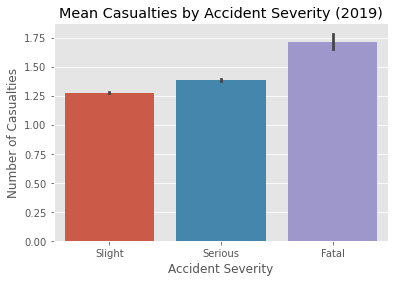

In [33]:
sns.barplot(x='Accident_Severity',
            y='Number_of_Casualties',
            data=df_accidents_decoded,
            estimator=np.mean)
plt.title("Mean Casualties by Accident Severity (2019)")
plt.ylabel("Number of Casualties")
plt.xlabel("Accident Severity")
plt.show()

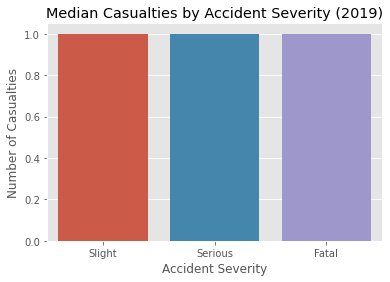

In [34]:
sns.barplot(x='Accident_Severity',
            y='Number_of_Casualties',
            data=df_accidents_decoded,
            estimator=np.median)
plt.title("Median Casualties by Accident Severity (2019)")
plt.ylabel("Number of Casualties")
plt.xlabel("Accident Severity")
plt.show()

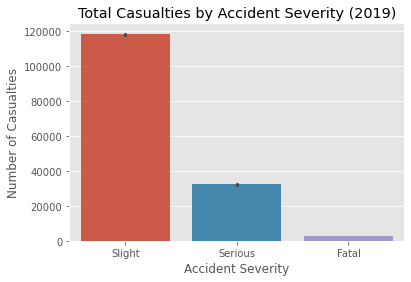

In [35]:
sns.barplot(x='Accident_Severity',
            y='Number_of_Casualties',
            data=df_accidents_decoded,
            estimator=np.sum)
plt.title("Total Casualties by Accident Severity (2019)")
plt.ylabel("Number of Casualties")
plt.xlabel("Accident Severity")
plt.show()

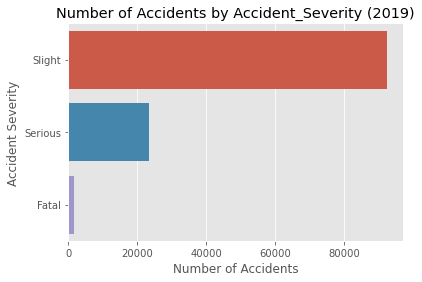

In [36]:
sns.countplot(y='Accident_Severity', data=df_accidents_decoded)
plt.title('Number of Accidents by Accident_Severity (2019)', color='black')
plt.xlabel("Number of Accidents")
plt.ylabel("Accident Severity")
plt.show()

In [37]:
df_accidents_decoded['Accident_Severity'].value_counts() * 100/len(df_accidents_decoded)

Slight     78.661857
Serious    19.927512
Fatal       1.410632
Name: Accident_Severity, dtype: float64

In [38]:
df_accidents_decoded['Number_of_Casualties'].sum()

153158

In [39]:
df_accidents_decoded.groupby(['Accident_Severity'])['Number_of_Casualties'].sum() * 100/ df_accidents_decoded['Number_of_Casualties'].sum()

Accident_Severity
Fatal       1.855600
Serious    21.148095
Slight     76.996304
Name: Number_of_Casualties, dtype: float64

Accidentrs have mostly 1 to 2 casualties. Majority of the acidents are labelled 'Slight'. Very little fatal accidents whose mean number of casualties is the highest among the three.

## Accident by Day of the Week

In [40]:
df_accidents_decoded.groupby('Day_of_Week')['Accident_Index'].count().reset_index().sort_values(by='Accident_Index')

,Day_of_Week,Accident_Index
3,Sunday,12935
2,Saturday,15556
1,Monday,16643
5,Tuesday,17598
6,Wednesday,17775
4,Thursday,17973
0,Friday,19056


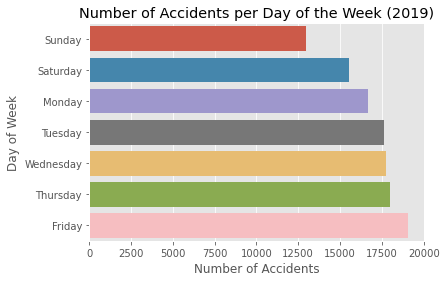

In [41]:
sns.barplot(x='Accident_Index', y='Day_of_Week', data=df_accidents_decoded.groupby('Day_of_Week')['Accident_Index'].count().reset_index().sort_values(by='Accident_Index'))
plt.title("Number of Accidents per Day of the Week (2019)")
plt.ylabel("Day of Week")
plt.xlabel("Number of Accidents")
plt.show()

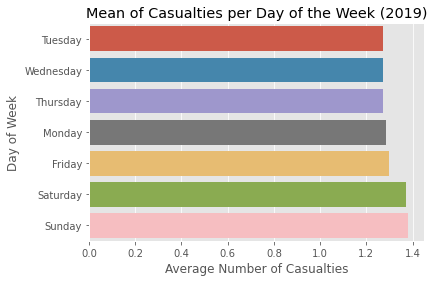

In [42]:
sns.barplot(x='Number_of_Casualties', y='Day_of_Week', data=df_accidents_decoded.groupby('Day_of_Week')['Number_of_Casualties'].mean().reset_index().sort_values(by='Number_of_Casualties'))
plt.title("Mean of Casualties per Day of the Week (2019)")
plt.ylabel("Day of Week")
plt.xlabel("Average Number of Casualties")
plt.show()

Evident that the number of casualties are higher in the weekends than in the weekdays althought the number of accidents on the weekends are at the lower side. Does that mean that more people are travelling in bigger vehicles. Given that many places in the UK are tourist spots, are these vehicles busses carrying tourists?


## Accident by Time of the Day

In [43]:
def get_radian(x):
    h,m = map(int,x)
    return 2 * np.pi * (h + m/60)/24

In [44]:
grouped_df = df_accidents_decoded[-df_accidents_decoded['Time'].isna()].groupby('Time')['Number_of_Casualties'].sum().reset_index()

In [45]:
grouped_df.head()

,Time,Number_of_Casualties
0,00:01,212
1,00:02,28
2,00:03,44
3,00:04,44
4,00:05,95


In [46]:
import datetime
time_series = grouped_df['Time'].str.split(':')
time_series = time_series.apply(get_radian)
time_series.head()

0    0.004363
1    0.008727
2    0.013090
3    0.017453
4    0.021817
Name: Time, dtype: float64

In [47]:
# Method to run this viz for other columns


def plot_by_time_of_the_day(df, time_col_name, plot_col_name, plot_title=None):
    """
    Radial plot by time.

    df: grouped dataframe
    time_col_name: name of the time column in format HH:MM
    plot_col_name: name of the column that contains estimated counts per time instance
    plot_title: title of the plot
    """
    fig = plt.figure(figsize=(7, 7))
    time_series = df[time_col_name].str.split(':')
    time_series = time_series.apply(get_radian)
    ax = plt.subplot(111, projection='polar')
    ax.bar(time_series, df[plot_col_name], width=0.1, alpha=0.3, color='red')

    # clockwise labels
    ax.set_theta_direction(-1)

    # place Zero at 12AM
    ax.set_theta_offset(np.pi / 2)

    # set circumference ticks
    ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))

    # set the label names
    ticks = [
        '12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM',
        '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM', '3 PM',
        '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'
    ]
    ax.set_xticklabels(ticks)

    # suppress the radial labels
    plt.setp(ax.get_yticklabels(), visible=False)

    # Radius
    plt.ylim(0, max(df[plot_col_name]))

    plt.title(plot_title, pad=30)

    plt.show()

<Figure size 504x504 with 0 Axes>

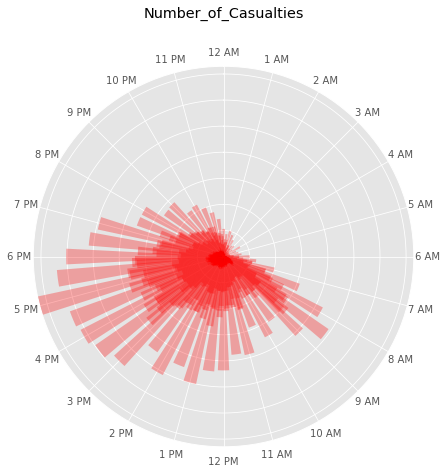

In [48]:
# Test

grouped_df = df_accidents_decoded[-df_accidents_decoded['Time'].isna(
)].groupby('Time')['Number_of_Casualties'].sum().reset_index()
fig = plt.figure(figsize=(7, 7))
plot_by_time_of_the_day(grouped_df, 'Time', 'Number_of_Casualties',
                        'Number_of_Casualties')

## Mean and sum for number of casualties and number of accidents by time of day

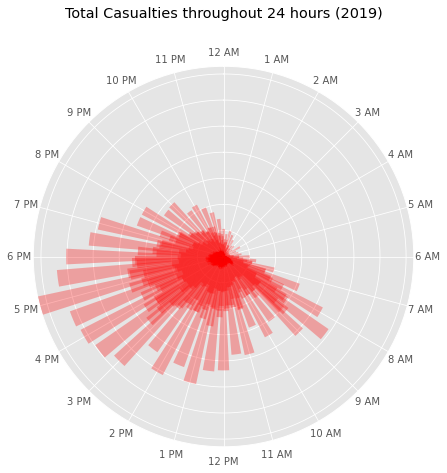

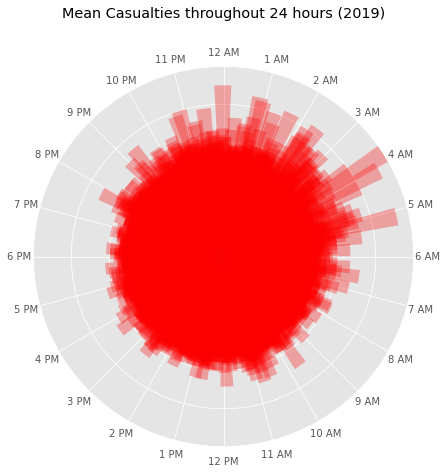

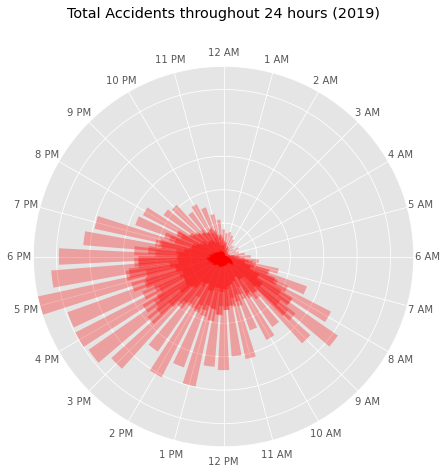

In [49]:
grouped_df1 = df_accidents_decoded[-df_accidents_decoded['Time'].isna(
)].groupby('Time')['Number_of_Casualties'].sum().reset_index()
grouped_df2 = df_accidents_decoded[-df_accidents_decoded['Time'].isna(
)].groupby('Time')['Number_of_Casualties'].mean().reset_index()
grouped_df3 = df_accidents_decoded[-df_accidents_decoded['Time'].isna(
)].groupby('Time')['Accident_Index'].count().reset_index()

plot_by_time_of_the_day(grouped_df1, 'Time', 'Number_of_Casualties',
                        'Total Casualties throughout 24 hours (2019)')
plot_by_time_of_the_day(grouped_df2, 'Time', 'Number_of_Casualties',
                        'Mean Casualties throughout 24 hours (2019)')
plot_by_time_of_the_day(grouped_df3, 'Time', 'Accident_Index',
                        'Total Accidents throughout 24 hours (2019)')

In [50]:
df_accidents_decoded.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Ped Cross - Human', 'Ped Cross - Physical',
       'Light_Conditions', 'Weather', 'Road Surface',
       'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban Rural',
       'Police Officer Attend', 'LSOA_of_Accident_Location',
       'East_North_OSGR'],
      dtype='object')

In [54]:
df_accidents_decoded['Date'] = pd.to_datetime(df_accidents_decoded['Date'], errors='ignore')
# df_accidents_decoded['Date'].head()
df_accidents_decoded['Month'] = df_accidents_decoded['Date'].dt.month
df_accidents_decoded[['Month', 'Date']].head()

,Month,Date
0,2,2019-02-18
1,1,2019-01-15
2,1,2019-01-01
3,1,2019-01-01
4,1,2019-01-01


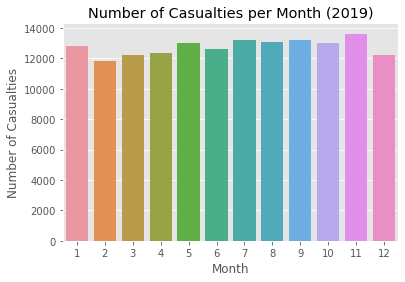

In [55]:
sns.barplot(x='Month', y='Number_of_Casualties', data=df_accidents_decoded.groupby('Month')['Number_of_Casualties'].sum().reset_index())
plt.title("Number of Casualties per Month (2019)")
plt.xlabel("Month")
plt.ylabel("Number of Casualties")
plt.show()

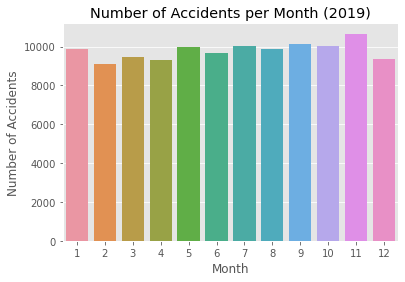

In [56]:
sns.barplot(x='Month',
            y='Accident_Index',
            data=df_accidents_decoded.groupby('Month')
            ['Accident_Index'].count().reset_index())

plt.title("Number of Accidents per Month (2019)")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.show()

Lesser accidents in Dec - Do people travel less due to severe weather conditions?

Accidents increase from Summer.Avg of Feb - Mar is low. April to Oct is higher while November has peak in accidents. 

## Analysis with Road Information

In [57]:
df_accidents_decoded.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Ped Cross - Human', 'Ped Cross - Physical',
       'Light_Conditions', 'Weather', 'Road Surface',
       'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban Rural',
       'Police Officer Attend', 'LSOA_of_Accident_Location', 'East_North_OSGR',
       'Month'],
      dtype='object')

In [58]:
rel_cols = ['Road_Type', 'Speed_limit', 'Junction_Detail', '1st_Road_Class', '2nd_Road_Class', 'Road Surface', 'Special_Conditions_at_Site' ]

In [59]:
len(rel_cols)

7

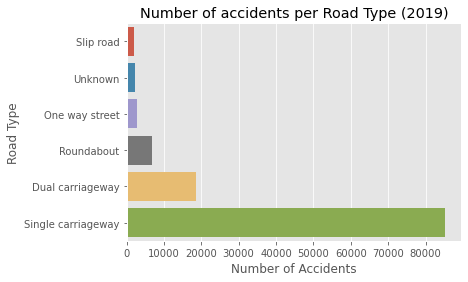

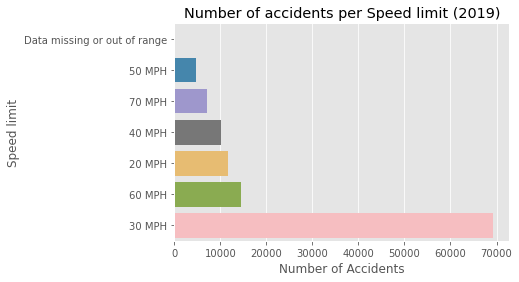

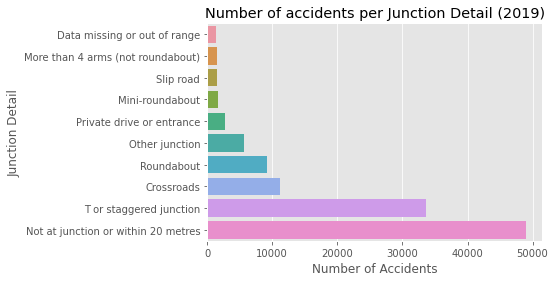

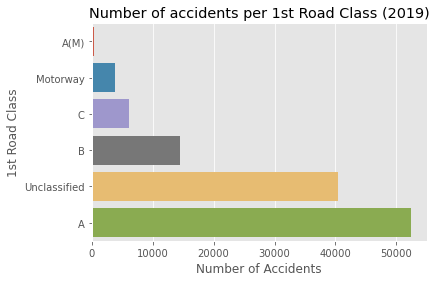

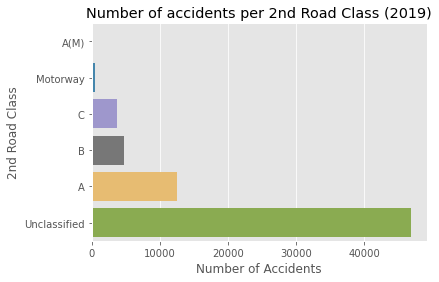

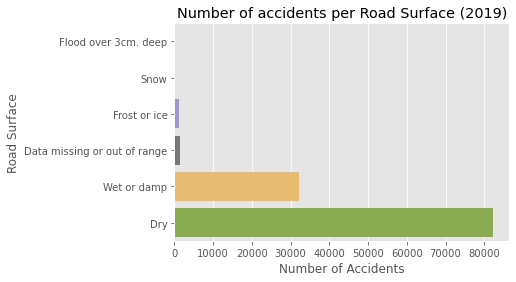

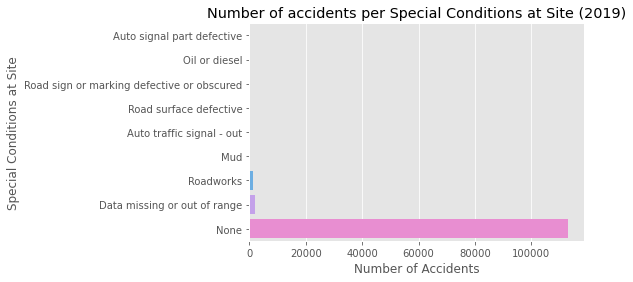

In [60]:
for each_col in rel_cols:
    sns.barplot(x='Accident_Index',
                y=each_col,
                data=df_accidents_decoded.groupby(each_col)['Accident_Index'].
                count().reset_index().sort_values(by='Accident_Index'))
    plt.title("Number of accidents per {} (2019)".format(
        each_col.replace('_', ' ')))
    plt.ylabel(each_col.replace('_', ' '))
    plt.xlabel("Number of Accidents")
    plt.show()

Dry roads have highest number of accidents :O

Crossroad, Other junction, roundabouts, T or staggered junctions (non-straight roads) if clubbed together, would surpass 'Not at a Junction or within 20 mts'.

A single carriageway (that has the highest nnumber of accidents) or undivided highway is a road with one, two or more lanes arranged within a single carriageway with no central reservation to separate opposing flows of traffic. A two-lane road or two-lane highway is a single carriageway with one lane for each direction. 

## Weather Conditions

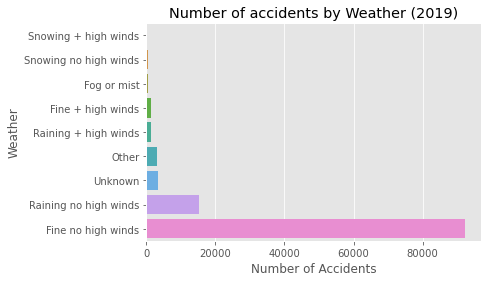

In [61]:
sns.barplot(x='Accident_Index', y='Weather', data=df_accidents_decoded.groupby('Weather')['Accident_Index'].count().reset_index().sort_values(by='Accident_Index'))
plt.title("Number of accidents by Weather (2019)")
plt.xlabel("Number of Accidents")
plt.show()

Just out of curiosity, is all the rows in Rain conditions are dry?

In [62]:
df_accidents_decoded.groupby(['Weather', 'Road Surface'])[[
    'Accident_Index'
]].count().reset_index().sort_values(by='Weather')

,Weather,Road Surface,Accident_Index
0,Fine + high winds,Data missing or out of range,4
1,Fine + high winds,Dry,761
2,Fine + high winds,Flood over 3cm. deep,3
3,Fine + high winds,Frost or ice,14
4,Fine + high winds,Snow,1
5,Fine + high winds,Wet or damp,447
6,Fine no high winds,Data missing or out of range,283
7,Fine no high winds,Dry,77791
8,Fine no high winds,Flood over 3cm. deep,21
9,Fine no high winds,Frost or ice,713


Snowing and raining weather conditions have 'Dry' road surface which is suspicious.

## Urban or Rural

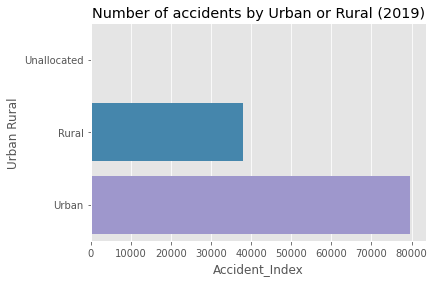

In [63]:
sns.barplot(x='Accident_Index', y='Urban Rural', data=df_accidents_decoded.groupby('Urban Rural')['Accident_Index'].count().reset_index().sort_values(by='Accident_Index'))
plt.title("Number of accidents by Urban or Rural (2019)")
plt.show()

In [64]:
df_accidents_decoded[df_accidents_decoded['Urban Rural'] == 'Unallocated'][:5]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather,Road Surface,Special_Conditions_at_Site,Carriageway_Hazards,Urban Rural,Police Officer Attend,LSOA_of_Accident_Location,East_North_OSGR,Month
27337,2019040854828,NaN,NaN,NaN,NaN,Lancashire,Slight,2,1,2019-06-21,...,Daylight,Fine no high winds,Dry,None,None,Unallocated,No,NaN,NaN,6
29369,2019051910615,NaN,NaN,NaN,NaN,Merseyside,Slight,1,1,2019-04-03,...,Darkness - lights lit,Raining + high winds,Wet or damp,None,None,Unallocated,Yes,NaN,NaN,4
30791,2019051912864,NaN,NaN,NaN,NaN,Merseyside,Serious,2,2,2019-08-11,...,Darkness - no lighting,Fine no high winds,Wet or damp,None,None,Unallocated,Yes,NaN,NaN,8
34816,2019070003662,NaN,NaN,NaN,NaN,Cheshire,Slight,1,1,2019-04-01,...,Daylight,Unknown,Dry,None,None,Unallocated,Yes,NaN,NaN,4
35505,2019070275916,NaN,NaN,NaN,NaN,Cheshire,Slight,2,1,2019-05-28,...,Daylight,Fine no high winds,Dry,None,None,Unallocated,No,NaN,NaN,5


In [65]:
df_accidents_decoded[df_accidents_decoded['Urban Rural'] == 'Unallocated'].shape

(28, 34)

This could be potentially backfilled from District and Area information

## Urban vs Rural by time of the day - Number of Casualties

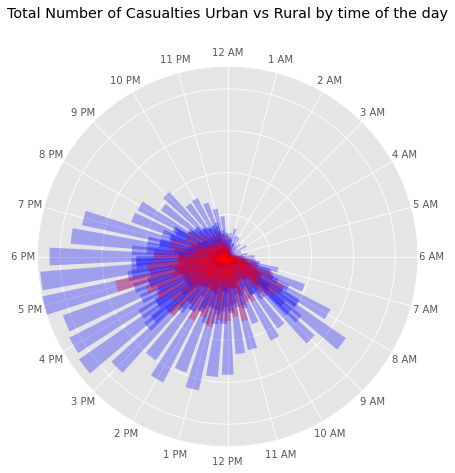

In [66]:
df1 = df_accidents_decoded[(-df_accidents_decoded['Time'].isna()) & (
    df_accidents_decoded['Urban Rural'] == 'Rural')].groupby(
        'Time')['Number_of_Casualties'].sum().reset_index()
df2 = df_accidents_decoded[(-df_accidents_decoded['Time'].isna()) & (
    df_accidents_decoded['Urban Rural'] == 'Urban')].groupby(
        'Time')['Number_of_Casualties'].sum().reset_index()

fig = plt.figure(figsize=(7, 7))
time_series1 = df1['Time'].str.split(':')
time_series1 = time_series1.apply(get_radian)

time_series2 = df2['Time'].str.split(':')
time_series2 = time_series2.apply(get_radian)

ax = plt.subplot(111, projection='polar')

ax.bar(time_series2,
       df2['Number_of_Casualties'],
       width=0.1,
       alpha=0.3,
       color='blue',
       label='Total Number of Casualties in Urban Areas')
ax.bar(time_series1,
       df1['Number_of_Casualties'],
       width=0.1,
       alpha=0.3,
       color='red',
       label='Total Number of Casualties in Rural Areas')

# clockwise labels
ax.set_theta_direction(-1)

# place Zero at 12AM
ax.set_theta_offset(np.pi / 2)

# set circumference ticks
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))

# set the label names
ticks = [
    '12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM',
    '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM',
    '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'
]
ax.set_xticklabels(ticks)

# suppress the radial labels
plt.setp(ax.get_yticklabels(), visible=False)

# Radius
plt.ylim(
    0, max(max(df1['Number_of_Casualties']), max(df2['Number_of_Casualties'])))

plt.title('Total Number of Casualties Urban vs Rural by time of the day',
          pad=30)

# plt.legend(bbox_to_anchor=(1.5, 0), fancybox=True, shadow=True)

plt.show()

## Urban vs Rural by time of the day - Number of accidents

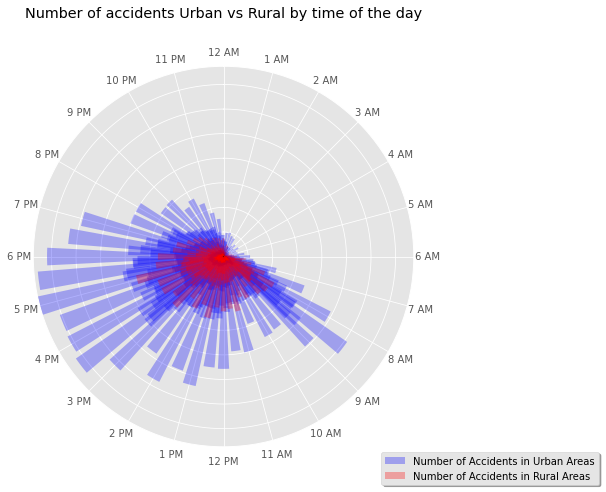

In [67]:
df1 = df_accidents_decoded[(-df_accidents_decoded['Time'].isna()) & (
    df_accidents_decoded['Urban Rural'] == 'Rural')].groupby(
        'Time')['Accident_Index'].count().reset_index()
df2 = df_accidents_decoded[(-df_accidents_decoded['Time'].isna()) & (
    df_accidents_decoded['Urban Rural'] == 'Urban')].groupby(
        'Time')['Accident_Index'].count().reset_index()

fig = plt.figure(figsize=(7, 7))
time_series1 = df1['Time'].str.split(':')
time_series1 = time_series1.apply(get_radian)

time_series2 = df2['Time'].str.split(':')
time_series2 = time_series2.apply(get_radian)

ax = plt.subplot(111, projection='polar')

ax.bar(time_series2,
       df2['Accident_Index'],
       width=0.1,
       alpha=0.3,
       color='blue',
       label='Number of Accidents in Urban Areas')
ax.bar(time_series1,
       df1['Accident_Index'],
       width=0.1,
       alpha=0.3,
       color='red',
       label='Number of Accidents in Rural Areas')

# clockwise labels
ax.set_theta_direction(-1)

# place Zero at 12AM
ax.set_theta_offset(np.pi / 2)

# set circumference ticks
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))

# set the label names
ticks = [
    '12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM',
    '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM',
    '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'
]
ax.set_xticklabels(ticks)

# suppress the radial labels
plt.setp(ax.get_yticklabels(), visible=False)

# Radius
plt.ylim(0, max(max(df1['Accident_Index']), max(df2['Accident_Index'])))

plt.title('Number of accidents Urban vs Rural by time of the day', pad=30)

plt.legend(bbox_to_anchor=(1.5, 0), fancybox=True, shadow=True)

plt.show()

In [68]:
df_accidents_decoded['Junction_Detail'].value_counts()

Not at junction or within 20 metres    48993
T or staggered junction                33660
Crossroads                             11221
Roundabout                              9183
Other junction                          5666
Private drive or entrance               2722
Mini-roundabout                         1664
Slip road                               1551
More than 4 arms (not roundabout)       1479
Data missing or out of range            1397
Name: Junction_Detail, dtype: int64

In [69]:
df_accidents_decoded[
    df_accidents_decoded['Junction_Detail'] !=
    "Not at junction or within 20 metres"]['Junction_Detail'].count()

68543

Thanks for Visiting!